# Pacotes

In [2]:
%pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import glob
import os

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose

# <font color='red'> 1)  Coleta dos dados</font>

### 1.1) Leitura dos arquivos

#### OBS: Escolhi utilizar os arquivos csv pela facilidade de leitura e pela velocidade para lê-los, já que ler os .xlsx estava super lento com a grande quantidade de dados

In [4]:
def get_csv_files(years: range = range(2000, 2021), directory: str = "../data") -> list: 
    dataframes_list = []

    for year in years:
        file_name = f"GERACAO_USINA_{year}.csv"
        file_path = os.path.join(directory, file_name)

        print(f"\nLendo o arquivo {file_name}...")

        if glob.glob(file_path):
            df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False)

            df['din_instante'] = pd.to_datetime(df['din_instante'])

            dataframes_list.append(df)
        else:
            raise Exception(f"O arquivo {file_name} não foi encontrado.")

    return dataframes_list

In [5]:
try: 
    dataframes = get_csv_files(range(2000, 2021), "../data")
except Exception as e:
    print(f"Erro: {e}")


Lendo o arquivo GERACAO_USINA_2000.csv...



Lendo o arquivo GERACAO_USINA_2001.csv...

Lendo o arquivo GERACAO_USINA_2002.csv...

Lendo o arquivo GERACAO_USINA_2003.csv...

Lendo o arquivo GERACAO_USINA_2004.csv...

Lendo o arquivo GERACAO_USINA_2005.csv...

Lendo o arquivo GERACAO_USINA_2006.csv...

Lendo o arquivo GERACAO_USINA_2007.csv...

Lendo o arquivo GERACAO_USINA_2008.csv...

Lendo o arquivo GERACAO_USINA_2009.csv...

Lendo o arquivo GERACAO_USINA_2010.csv...

Lendo o arquivo GERACAO_USINA_2011.csv...

Lendo o arquivo GERACAO_USINA_2012.csv...

Lendo o arquivo GERACAO_USINA_2013.csv...

Lendo o arquivo GERACAO_USINA_2014.csv...

Lendo o arquivo GERACAO_USINA_2015.csv...

Lendo o arquivo GERACAO_USINA_2016.csv...

Lendo o arquivo GERACAO_USINA_2017.csv...

Lendo o arquivo GERACAO_USINA_2018.csv...

Lendo o arquivo GERACAO_USINA_2019.csv...

Lendo o arquivo GERACAO_USINA_2020.csv...


### 1.2) Observando dados crus

In [6]:
display(dataframes[0].head(10))

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao
0,2000-01-01,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2422.5
1,2000-01-01,NE,NORDESTE,AL,ALAGOAS,TIPO I,HIDROELÉTRICA,Hidráulica,Xingó,UHE.PH.SE.027053-9.01,1995.6
2,2000-01-01,NE,NORDESTE,BA,BAHIA,Pequenas Usinas (Tipo III),HIDROELÉTRICA,Hidráulica,Pequenas Centrais Hidroelétricas da Chesf,-,13.0
3,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Apolônio Sales,UHE.PH.AL.001510-5.01,202.5
4,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso II,UHE.PH.BA.027048-2.01,269.8
5,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Sobradinho,UHE.PH.BA.002755-3.01,322.8
6,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso IV,UHE.PH.BA.027050-4.01,779.4
7,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso I,UHE.PH.BA.002012-5.01,119.4
8,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso III,UHE.PH.BA.027049-0.01,480.4
9,2000-01-01,NE,NORDESTE,BA,BAHIA,TIPO I,TÉRMICA,Gás,Camaçari,UTE.GN.BA.000602-5.01,0.0


In [7]:
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993556 entries, 0 to 993555
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   din_instante            993556 non-null  datetime64[ns]
 1   id_subsistema           993556 non-null  object        
 2   nom_subsistema          993556 non-null  object        
 3   id_estado               993556 non-null  object        
 4   nom_estado              993556 non-null  object        
 5   cod_modalidadeoperacao  993556 non-null  object        
 6   nom_tipousina           993556 non-null  object        
 7   nom_tipocombustivel     993556 non-null  object        
 8   nom_usina               993556 non-null  object        
 9   ceg                     993556 non-null  object        
 10  val_geracao             993556 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 83.4+ MB


In [8]:
dataframes[0].shape

(993556, 11)

# <font color='red'> 2) Preparação inicial dos dados</font>

### 2.1) Seleção dos dados

#### 2.1.1) Selecionando apenas alguns atributos 

#### OBS: Agrupei os dados para a região sudeste e com foco na geração de energia por meio de hidrelétricas

In [9]:
def select_data(dataframes: list[pd.DataFrame], cols: list) -> list[pd.DataFrame]:
    output = []
    for df in dataframes: 
        subset = df[(df['id_subsistema'] == 'SE') & (df['nom_tipousina'] == 'HIDROELÉTRICA')].reset_index(drop=True)

        subset = subset[cols]

        output.append(subset)

    return output

In [10]:
cols = ["din_instante", "id_estado", "val_geracao"]

select_data = select_data(dataframes, cols)

In [11]:
display(select_data[0].head(10))

,din_instante,id_estado,val_geracao
0,2000-01-01,DF,23.0
1,2000-01-01,ES,125.0
2,2000-01-01,ES,13.0
3,2000-01-01,GO,6.0
4,2000-01-01,GO,301.8
5,2000-01-01,GO,424.5
6,2000-01-01,GO,592.0
7,2000-01-01,I,3528.2
8,2000-01-01,MG,924.3
9,2000-01-01,MG,97.2


#### 2.1.2) Removendo estados que estão como sudeste: identificou-se que alguns estados do centro-oeste estavam identificados como estados do sudeste

In [12]:
df = pd.concat(select_data)

valores_unicos = df['id_estado'].unique()

print(valores_unicos)

['DF' 'ES' 'GO' 'I' 'MG' 'MS' 'MT' 'PR' 'RJ' 'SP' 'TO' 'PA' 'RO']


In [13]:
def remove_states_from_sudeste(dataframes: list[pd.DataFrame]) -> list[pd.DataFrame]:
    output = []
    states = ['ES', 'MG', 'RJ', 'SP']
    for df in dataframes:
        subset = df[df['id_estado'].isin(states)].reset_index(drop=True)

        output.append(subset)

    return output

In [14]:
select_data = remove_states_from_sudeste(select_data)

display(select_data[0].head(10))

,din_instante,id_estado,val_geracao
0,2000-01-01,ES,125.0
1,2000-01-01,ES,13.0
2,2000-01-01,MG,924.3
3,2000-01-01,MG,97.2
4,2000-01-01,MG,23.4
5,2000-01-01,MG,29.3
6,2000-01-01,MG,244.5
7,2000-01-01,MG,120.0
8,2000-01-01,MG,75.0
9,2000-01-01,MG,139.6


In [15]:
select_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500631 entries, 0 to 500630
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   din_instante  500631 non-null  datetime64[ns]
 1   id_estado     500631 non-null  object        
 2   val_geracao   500631 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.5+ MB


#### 2.1.3) Concatenando dataframes de select_data

In [16]:
select_data_concat = pd.concat(select_data)

select_data_concat.shape

(13294780, 3)

In [17]:
display(select_data_concat.tail(10))

,din_instante,id_estado,val_geracao
720278,2020-12-31 23:00:00,SP,23.828
720279,2020-12-31 23:00:00,SP,81.620
720280,2020-12-31 23:00:00,SP,21.420
720281,2020-12-31 23:00:00,SP,1.030
720282,2020-12-31 23:00:00,SP,9.000
720283,2020-12-31 23:00:00,SP,846.201
720284,2020-12-31 23:00:00,SP,86.978
720285,2020-12-31 23:00:00,SP,19.230
720286,2020-12-31 23:00:00,SP,101.739
720287,2020-12-31 23:00:00,SP,16.471


#### 2.1.4) Agrupando por datas (mês e ano) e estados 

In [18]:
def groupby_month(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    df['ano-mes'] = df['din_instante'].dt.to_period('M')
    
    # Agrupar por 'ano-mes' e 'estado', somando 'val_geracao'
    df_agrupado = df.groupby(['ano-mes'])['val_geracao'].sum().reset_index()
    
    return df_agrupado

In [19]:
def groupby_month_and_state(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    df['ano-mes'] = df['din_instante'].dt.to_period('M')
    
    # Agrupar por 'ano-mes' e 'estado', somando 'val_geracao'
    df_agrupado = df.groupby(['ano-mes', 'id_estado'])['val_geracao'].sum().reset_index()
    
    return df_agrupado

In [20]:
def groupby_year(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    mean_val_geracao_ano = df.groupby('ano')['val_geracao'].sum().reset_index()
    
    return mean_val_geracao_ano

In [21]:
def groupby_year_and_state(concat_dataframe: pd.DataFrame) -> pd.DataFrame:
    df = concat_dataframe
    # Criar coluna 'ano-mes' baseada na coluna 'din_instante'
    mean_val_geracao_year_state = df.groupby(['ano', 'id_estado'])['val_geracao'].sum().reset_index()
    
    return mean_val_geracao_year_state

### 2.2) Limpeza dos dados 

#### 2.2.1) Identificando e Corrigindo de dados ausentes (se houver): para isso uso os dados sem agrupamento algum 

In [22]:
def plot_missing_data(select_data_concat: pd.DataFrame) -> None:
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

    print(select_data_concat.isna().sum())

In [23]:
def missing_data_correction(dataframes: list[pd.DataFrame]) -> pd.DataFrame:
    
    output = []
    for df in dataframes:
        # Verificar se há dados ausentes
        if df['val_geracao'].isnull().any():
            # Substituir valores ausentes pela média
            media_val_geracao = df['val_geracao'].mean()
            df['val_geracao'].fillna(media_val_geracao, inplace=True)

        output.append(df)

    return pd.concat(output)

din_instante        0
id_estado           0
val_geracao     84136
dtype: int64


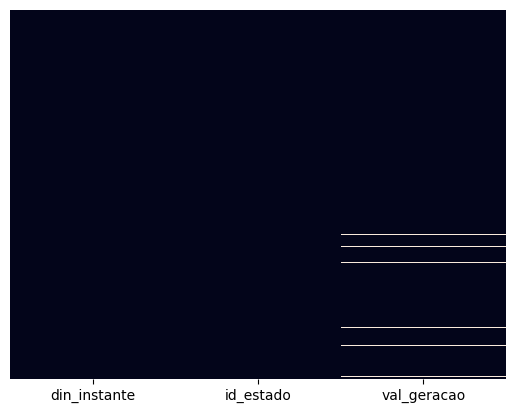

In [24]:
plot_missing_data(select_data_concat)

In [25]:
clean_data_concat = missing_data_correction(select_data)

In [26]:
display(clean_data_concat.head(10))

,din_instante,id_estado,val_geracao
0,2000-01-01,ES,125.0
1,2000-01-01,ES,13.0
2,2000-01-01,MG,924.3
3,2000-01-01,MG,97.2
4,2000-01-01,MG,23.4
5,2000-01-01,MG,29.3
6,2000-01-01,MG,244.5
7,2000-01-01,MG,120.0
8,2000-01-01,MG,75.0
9,2000-01-01,MG,139.6


din_instante    0
id_estado       0
val_geracao     0
dtype: int64


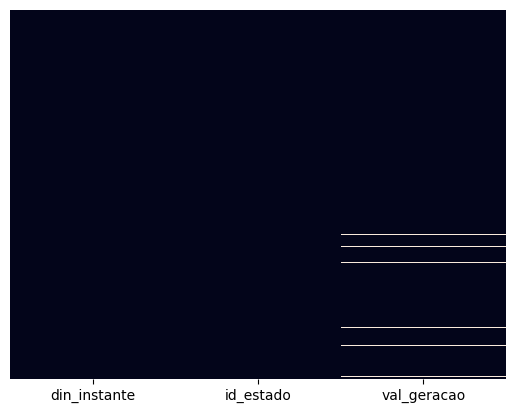

In [27]:
plot_missing_data(clean_data_concat)

In [28]:
# Agrupando dados limpos por mês
data_wo_missing_values_month = groupby_month(clean_data_concat)
data_wo_missing_values_month_state = groupby_month_and_state(clean_data_concat)

display(data_wo_missing_values_month.head(10))
display(data_wo_missing_values_month_state.head(10))

,ano-mes,val_geracao
0,2000-01,1.071918e+07
1,2000-02,1.035681e+07
2,2000-03,1.080006e+07
3,2000-04,1.068840e+07
4,2000-05,1.153444e+07
5,2000-06,1.115205e+07
6,2000-07,1.083703e+07
7,2000-08,1.071398e+07
8,2000-09,9.167134e+06
9,2000-10,1.028457e+07


,ano-mes,id_estado,val_geracao
0,2000-01,ES,1.630222e+05
1,2000-01,MG,4.790032e+06
2,2000-01,RJ,6.133784e+05
3,2000-01,SP,5.152747e+06
4,2000-02,ES,1.633566e+05
5,2000-02,MG,4.760096e+06
6,2000-02,RJ,5.918736e+05
7,2000-02,SP,4.841480e+06
8,2000-03,ES,1.830955e+05
9,2000-03,MG,4.619601e+06


#### 2.2.2) Identificando e Corrigindo de dados outliers (se houver): para isso, uso os dados agrupados em mês e em mês em conjunto com estado

In [29]:
def plot_outliers_data(data_groupby: pd.DataFrame) -> None:
    sns.boxplot(x='val_geracao', data=data_groupby)
    plt.show()


In [30]:
def outliers_correction(data_groupby: pd.DataFrame) -> pd.DataFrame:
    df = data_groupby
    
    Q1 = df['val_geracao'].quantile(0.25)
    Q3 = df['val_geracao'].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df['val_geracao'] = np.where(df['val_geracao'] > upper_whisker,upper_whisker, np.where(df['val_geracao'] < lower_whisker,lower_whisker,df['val_geracao']))

    return df

##### 2.2.2.1) Para o agrupamento apenas por mês

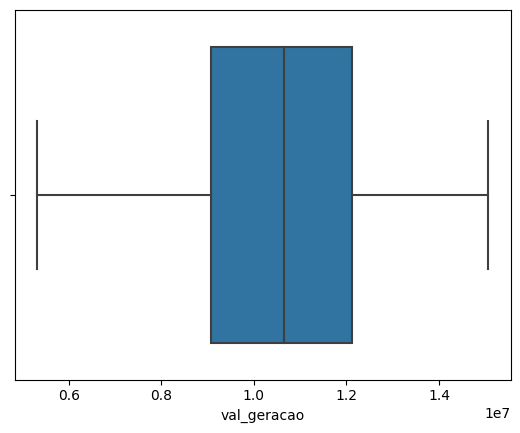

In [31]:
plot_outliers_data(data_wo_missing_values_month)

In [32]:
data_cleaned_month = outliers_correction(data_wo_missing_values_month)

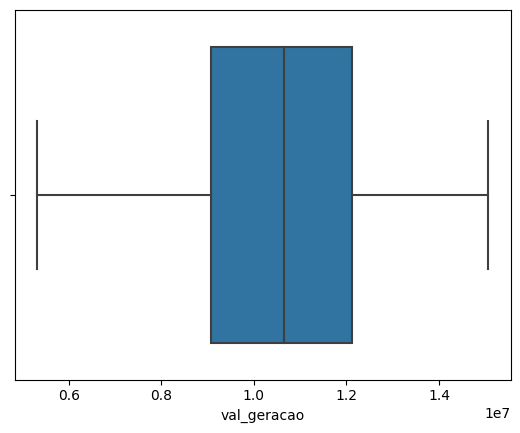

In [33]:
plot_outliers_data(data_cleaned_month)

##### 2.2.2.2) Para o agrupamento por mês e estado

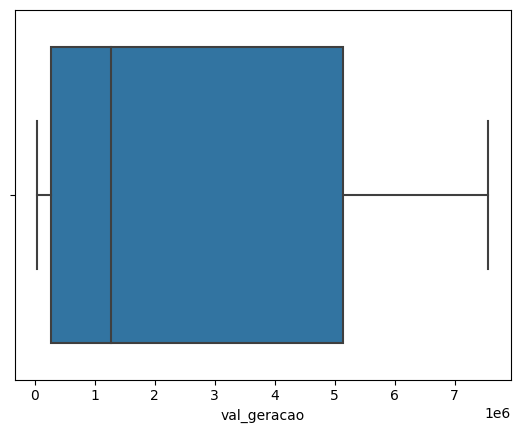

In [34]:
plot_outliers_data(data_wo_missing_values_month_state)

In [35]:
data_cleaned_month_state = outliers_correction(data_wo_missing_values_month_state)

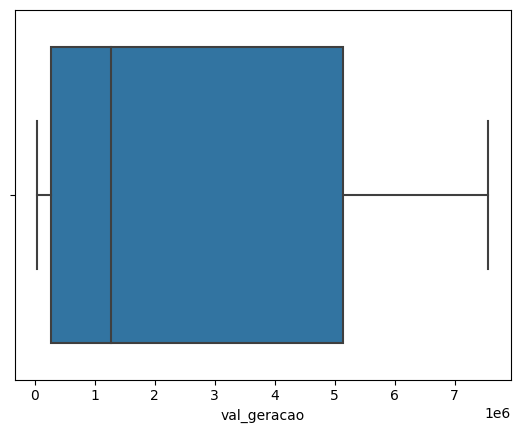

In [36]:
plot_outliers_data(data_cleaned_month_state)

In [37]:
data_cleaned_month['ano'] = data_cleaned_month["ano-mes"].dt.year
data_cleaned_month['mes'] = data_cleaned_month["ano-mes"].dt.month

In [38]:
data_cleaned_month_state['ano'] = data_cleaned_month_state["ano-mes"].dt.year
data_cleaned_month_state['mes'] = data_cleaned_month_state["ano-mes"].dt.month

In [39]:
display(data_cleaned_month.head(10))

,ano-mes,val_geracao,ano,mes
0,2000-01,1.071918e+07,2000,1
1,2000-02,1.035681e+07,2000,2
2,2000-03,1.080006e+07,2000,3
3,2000-04,1.068840e+07,2000,4
4,2000-05,1.153444e+07,2000,5
5,2000-06,1.115205e+07,2000,6
6,2000-07,1.083703e+07,2000,7
7,2000-08,1.071398e+07,2000,8
8,2000-09,9.167134e+06,2000,9
9,2000-10,1.028457e+07,2000,10


In [40]:
display(data_cleaned_month_state.head(10))

,ano-mes,id_estado,val_geracao,ano,mes
0,2000-01,ES,1.630222e+05,2000,1
1,2000-01,MG,4.790032e+06,2000,1
2,2000-01,RJ,6.133784e+05,2000,1
3,2000-01,SP,5.152747e+06,2000,1
4,2000-02,ES,1.633566e+05,2000,2
5,2000-02,MG,4.760096e+06,2000,2
6,2000-02,RJ,5.918736e+05,2000,2
7,2000-02,SP,4.841480e+06,2000,2
8,2000-03,ES,1.830955e+05,2000,3
9,2000-03,MG,4.619601e+06,2000,3


# <font color='red'> 3) Análise Exploratória dos dados</font>

### 3.1) Energia total ao longo dos meses

In [41]:
def plot_data_groupby_month(data_groupby_month: pd.DataFrame):
    plt.figure(figsize=(12, 6))

    anos_meses = data_groupby_month['ano-mes'].astype(str)
    val_geracao = data_groupby_month['val_geracao'] / 1e6

    # Calcular as diferenças de geração entre os meses
    diff_val_geracao = val_geracao.diff()

    plt.plot(anos_meses, val_geracao, color='b', linestyle='-', label='Geração Mensal')
    plt.bar(anos_meses, diff_val_geracao, color='orange', label='Diferença de Geração Mensal')

    plt.title('Geração de energia Hidrelétrica ao longo dos meses e Diferença Mensal')
    plt.xlabel('Ano-Mês (6 em 6 meses)')
    plt.ylabel('Valor de Geração (em milhões MWmed)')

    plt.xticks(rotation=45, ha='right')
    plt.xticks(anos_meses[::6])

    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

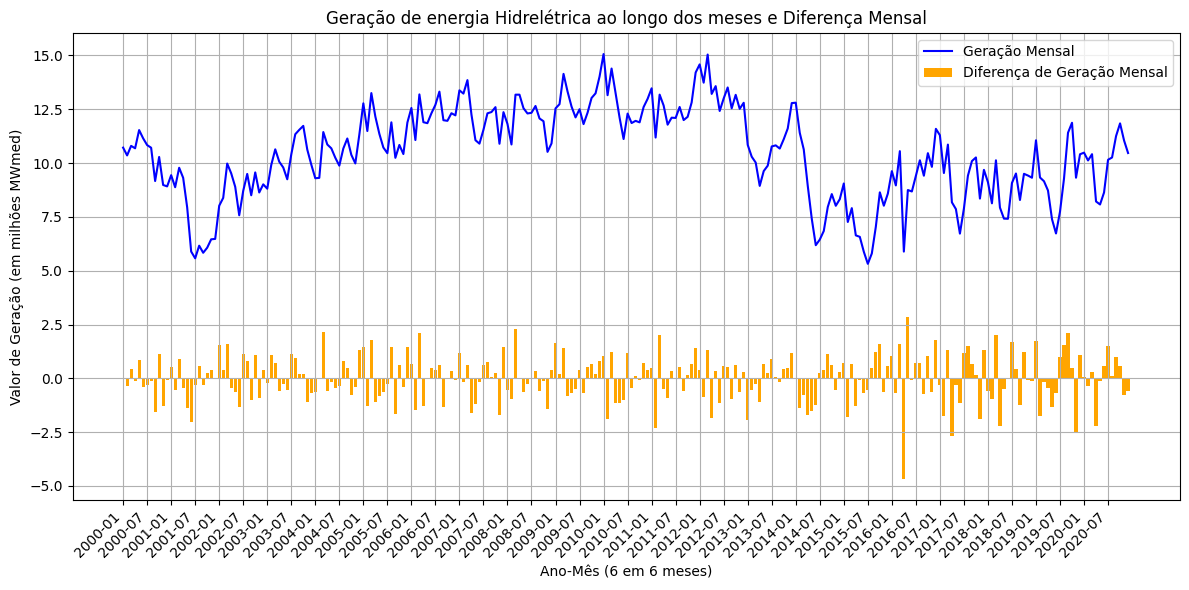

In [42]:
plot_data_groupby_month(data_cleaned_month)

### 3.2) Geração média de energia mensal

In [43]:
def plot_mean_val_geracao(data):

    plt.figure(figsize=(12, 6))
    
    meses = data['mes'].unique()
    mean_val_geracao = data.groupby('mes')['val_geracao'].mean() / 1e6
    
    bars = plt.bar(meses, mean_val_geracao, color='b')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.title('Geração (média) de energia hidreletrica ao longo dos meses')
    plt.xlabel('Mês')
    plt.ylabel('Geração média (em milhões MWmed)')
    plt.xticks(meses)
    
    plt.show()

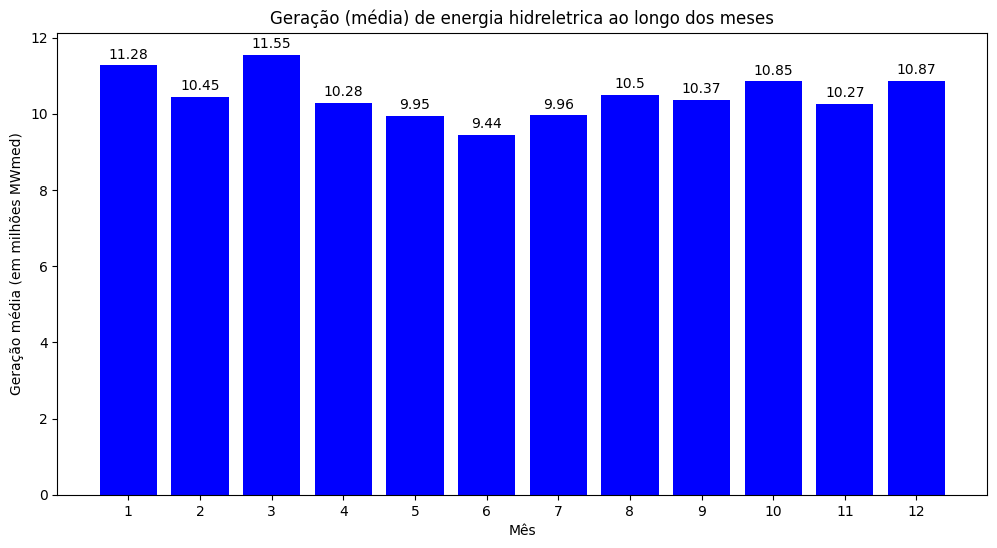

In [44]:
# Call the function with your DataFrame
plot_mean_val_geracao(data_cleaned_month)

### 3.3) Energia total ao longo dos meses (para cada estado)

In [45]:
def plot_data_groupby_month_and_state(data_groupby_month_state: pd.DataFrame, state_name: str):

    plt.figure(figsize=(10, 6))

    anos_meses = data_groupby_month_state['ano-mes'].astype(str) 
    val_geracao = data_groupby_month_state['val_geracao'] / 1e6  
    
    diff_val_geracao = val_geracao.diff()

    plt.plot(anos_meses, val_geracao, linestyle='-', label='Geração Mensal')
    plt.bar(anos_meses, diff_val_geracao, color='orange', label='Diferença de Geração Mensal')

    plt.plot(anos_meses, val_geracao, linestyle='-', color='b')
    plt.title(f'Geração de energia hidrelétrica no {state_name} ao longo dos meses')
    plt.xlabel('Ano-Mês (6 em 6 meses)')
    plt.ylabel('Valor de Geração (em milhões MWmed)')
    plt.xticks(rotation=45) 

    plt.xticks(anos_meses[::6])

    plt.tight_layout()
    plt.grid(True)
    plt.show()

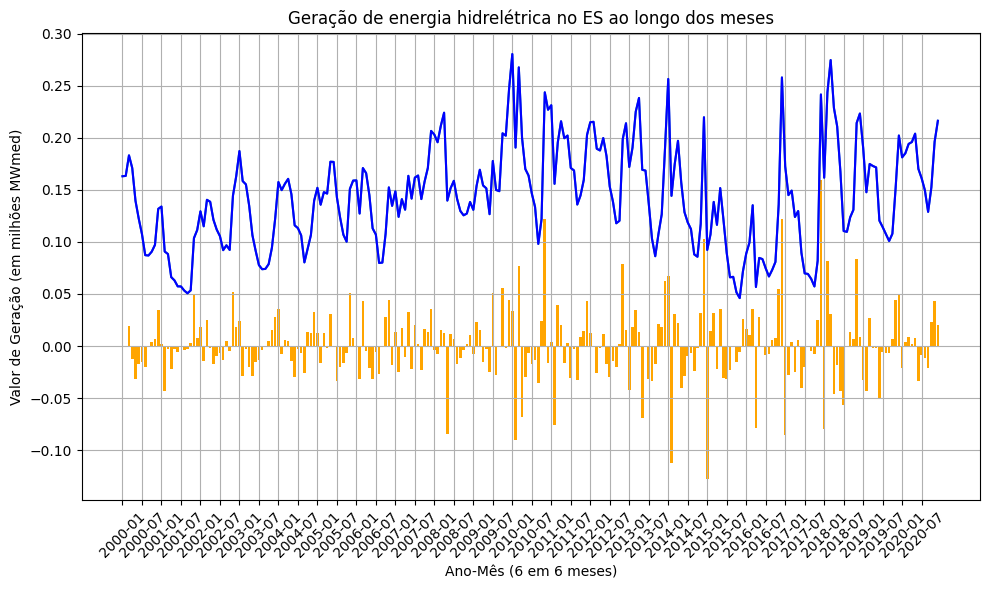

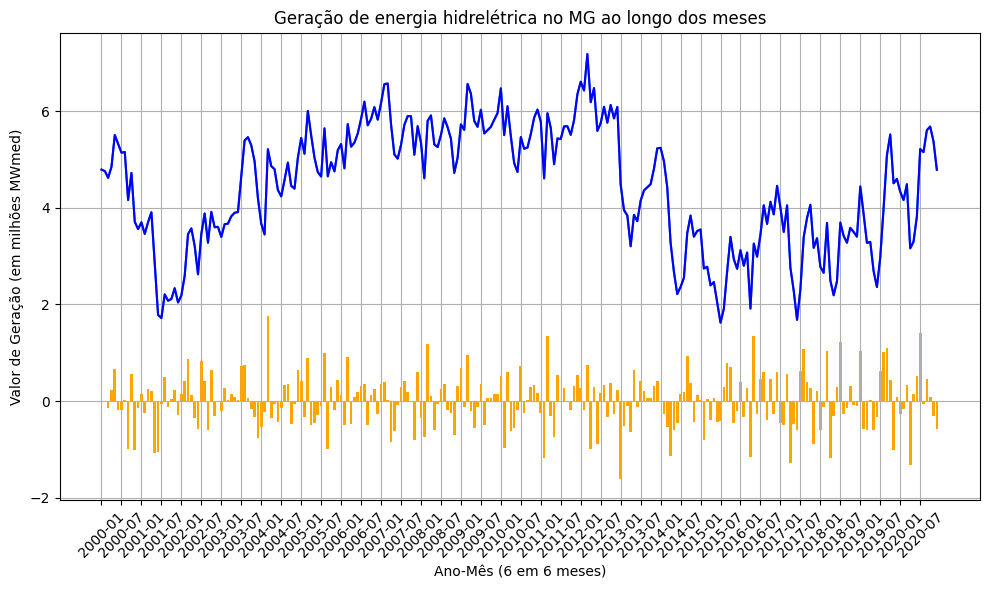

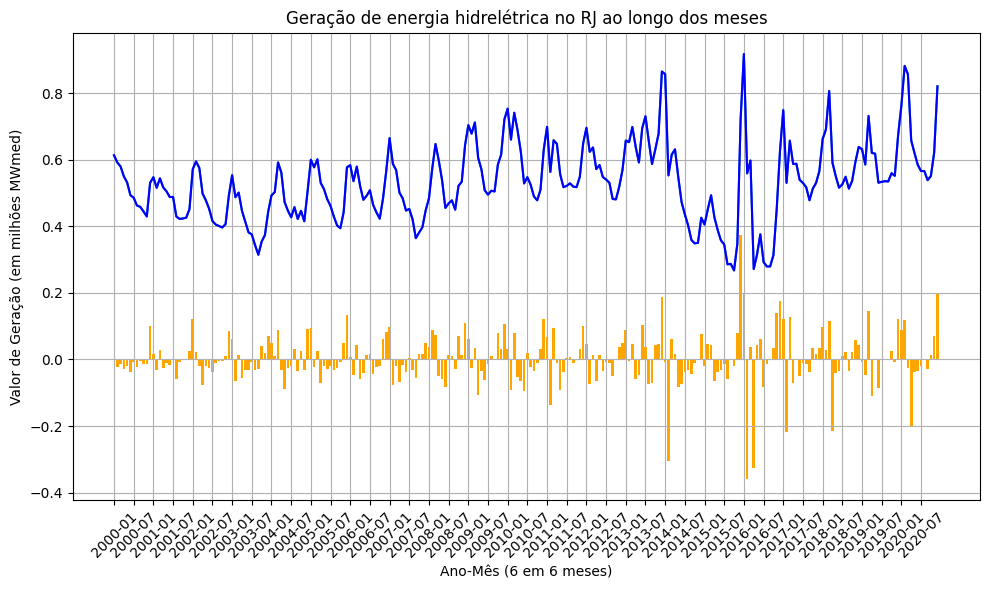

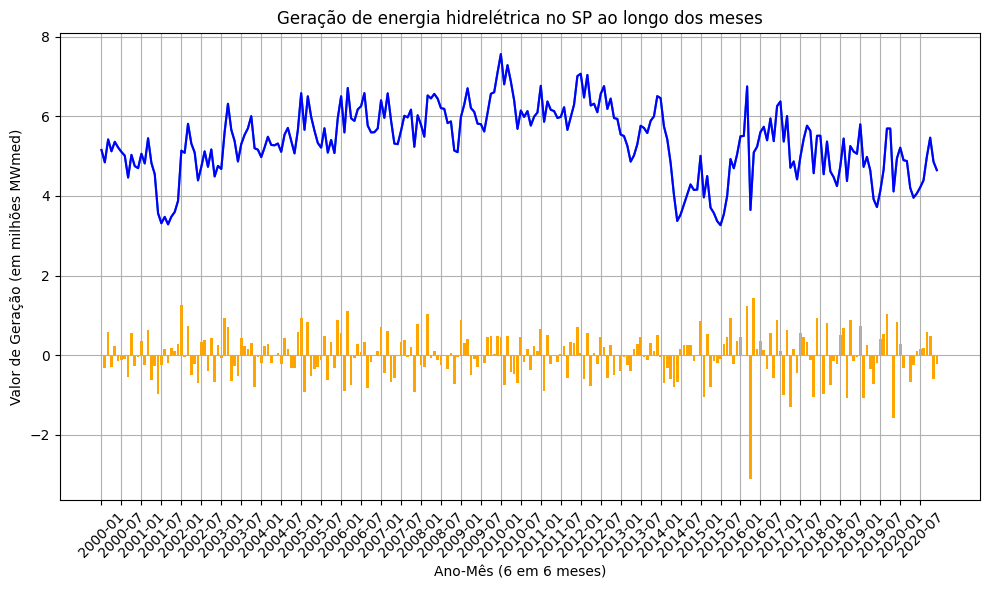

In [46]:
for state_name, state_data in data_cleaned_month_state.groupby('id_estado'):
    plot_data_groupby_month_and_state(state_data, state_name)

### 3.4) Geração de energia média por estado

In [47]:
def plot_mean_val_geracao_state(data_cleaned_month_state: pd.DataFrame):

    mean_val_geracao_estado = data_cleaned_month_state.groupby('id_estado')['val_geracao'].mean()

    plt.figure(figsize=(10, 6))
    mean_val_geracao_estado.plot(kind='bar', color='blue')
    plt.title('Média da Geração de Energia por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Geração Média (em milhões MWmed)')
    plt.xticks(rotation=0)

    for index, value in enumerate(mean_val_geracao_estado):
        plt.text(index, value, str(round(value / 1e6, 2)), ha='center', va='bottom')

    plt.show()

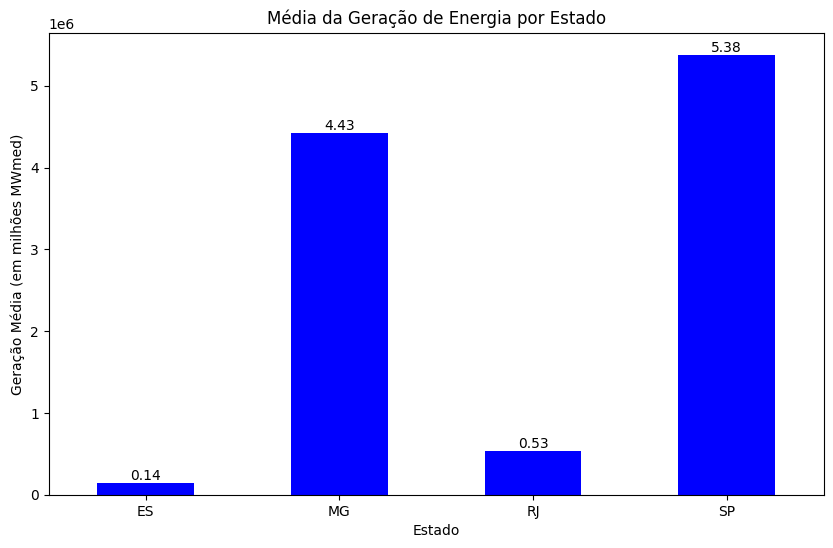

In [48]:
plot_mean_val_geracao_state(data_cleaned_month_state)

### 3.5) Energia total ao longo dos anos

In [49]:
data_groupby_year = groupby_year(data_cleaned_month)

In [50]:
display(data_groupby_year.head(10))

,ano,val_geracao
0,2000,1.241543e+08
1,2001,8.782763e+07
2,2002,1.063059e+08
3,2003,1.240454e+08
4,2004,1.252474e+08
5,2005,1.375092e+08
6,2006,1.474132e+08
7,2007,1.467880e+08
8,2008,1.443459e+08
9,2009,1.544492e+08


In [51]:
def plot_data_groupby_year(data_groupby_year: pd.DataFrame):
    plt.figure(figsize=(12, 6))

    anos = data_groupby_year['ano'].astype(str) 
    val_geracao = data_groupby_year['val_geracao'] / 1e6  

    bars = plt.bar(anos, val_geracao, color='b')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.title('Geração de energia Hidrelétrica ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Valor de Geração (em milhões MWmed)')

    plt.tight_layout()
    plt.show()

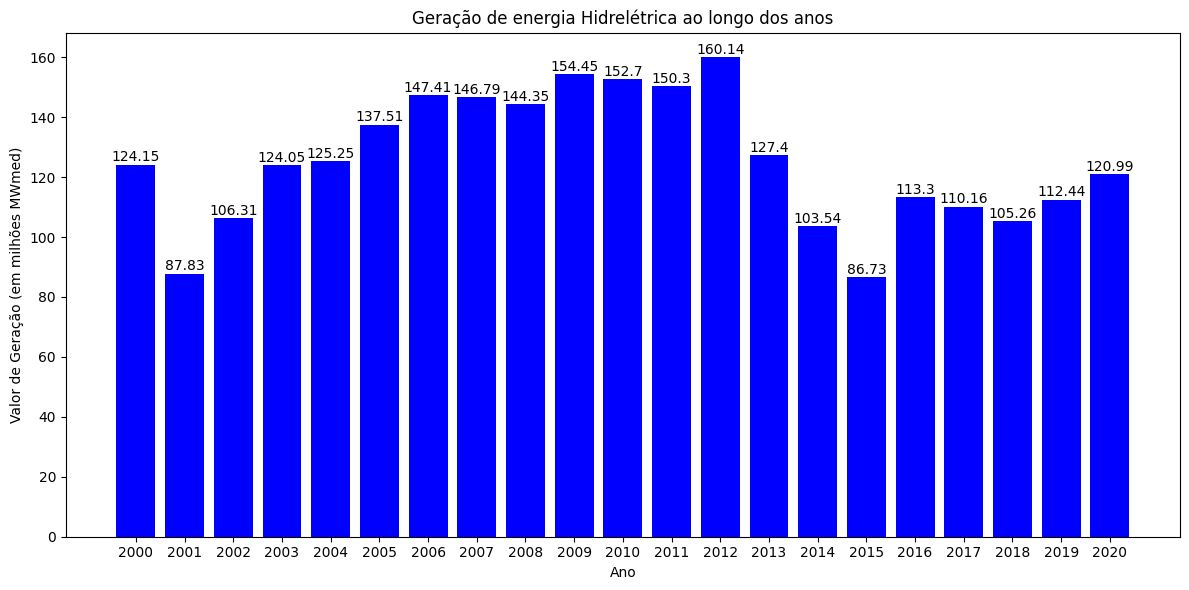

In [52]:
plot_data_groupby_year(data_groupby_year)

### 3.6) Geração de Energia média ao longo dos anos para cada estado

In [53]:
data_groupby_year_state = groupby_year_and_state(data_cleaned_month_state)

In [54]:
display(data_groupby_year_state.head(10))

,ano,id_estado,val_geracao
0,2000,ES,1.543397e+06
1,2000,MG,5.628826e+07
2,2000,RJ,6.170750e+06
3,2000,SP,6.015191e+07
4,2001,ES,9.293457e+05
5,2001,MG,3.186646e+07
6,2001,RJ,5.757143e+06
7,2001,SP,4.927468e+07
8,2002,ES,1.450155e+06
9,2002,MG,3.937028e+07


In [55]:
def plot_data_groupby_year_and_state(data_groupby_year_state: pd.DataFrame, state_name: str):

    plt.figure(figsize=(10, 6))

    anos = data_groupby_year_state['ano'].astype(str) 
    val_geracao = data_groupby_year_state['val_geracao'] / 1e6 

    bars = plt.bar(anos, val_geracao, color='b')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.title(f'Geração de energia Hidrelétrica {state_name} ao longo dos anos')
    plt.xlabel('Ano')
    plt.ylabel('Valor de Geração (em milhões MWmed)')
    
    plt.tight_layout()
    plt.show()

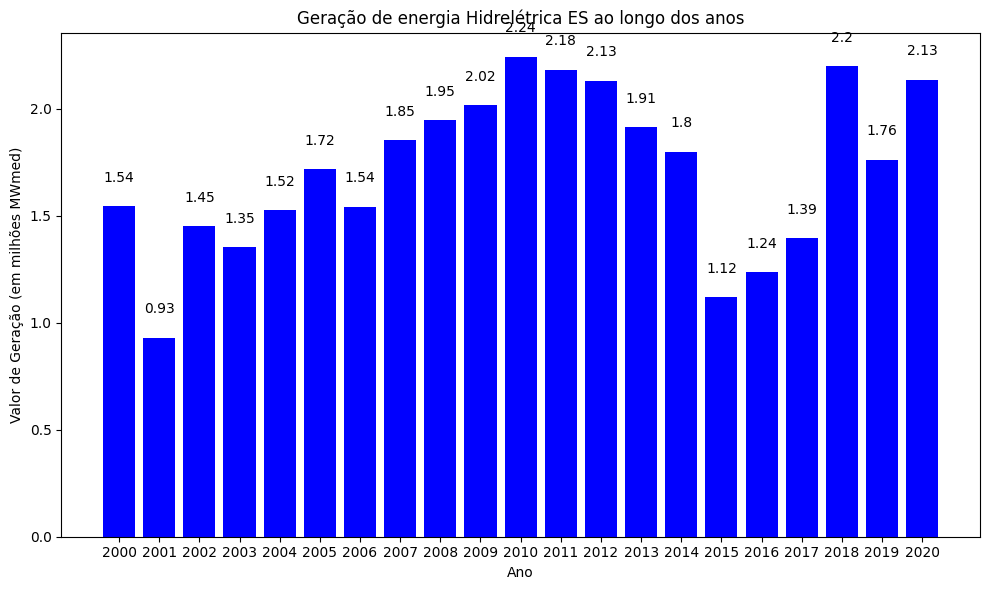

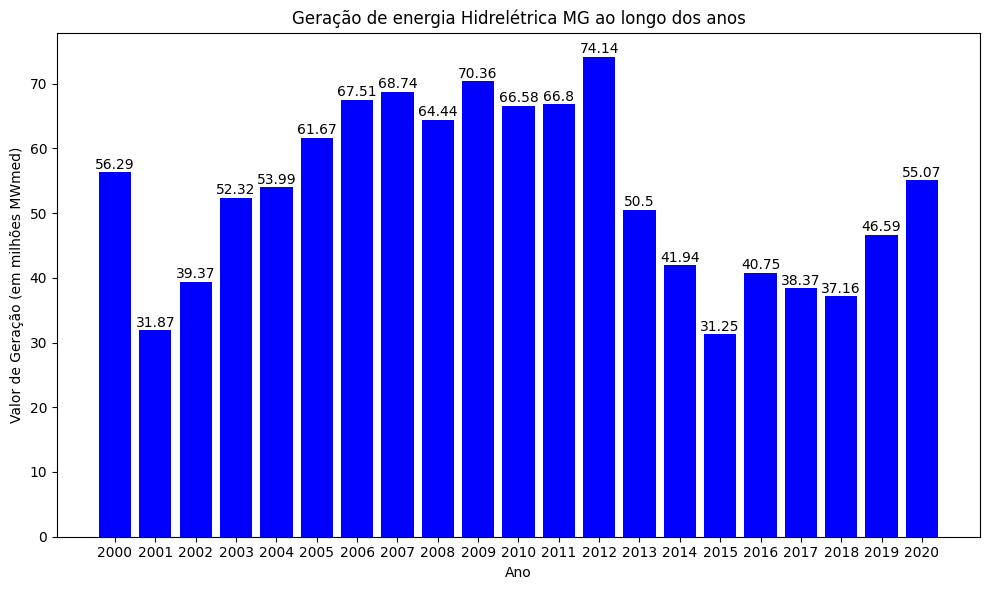

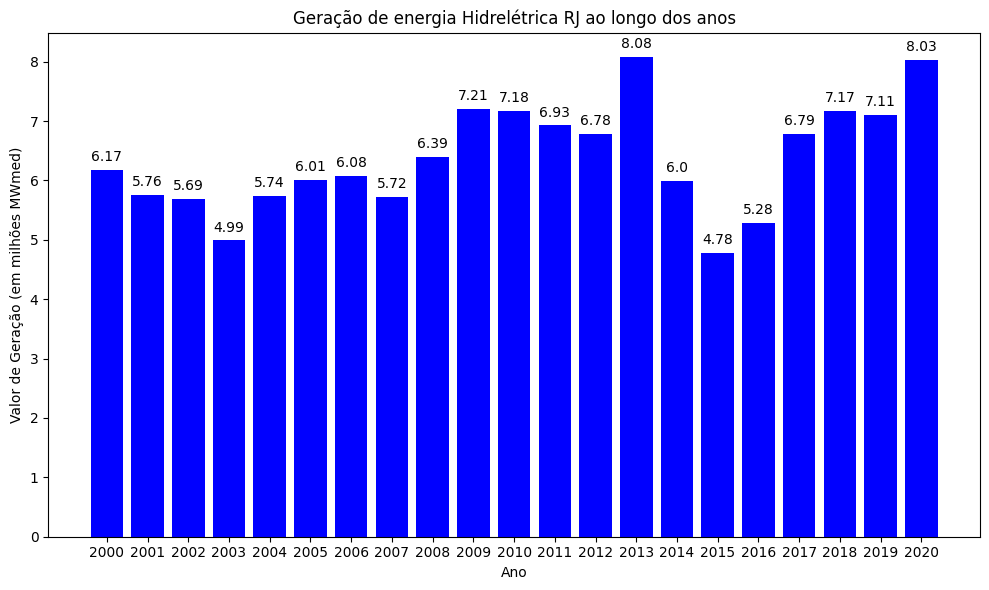

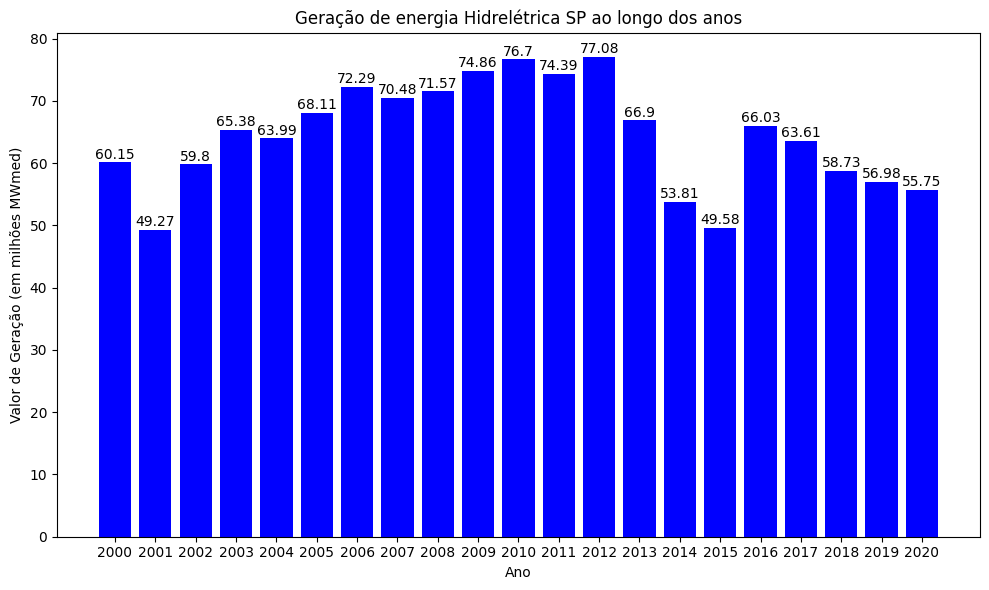

In [56]:
for state_name, state_data in data_groupby_year_state.groupby('id_estado'):
    plot_data_groupby_year_and_state(state_data, state_name)

### 3.7) Visualizando decomposição na série temporal mensal 

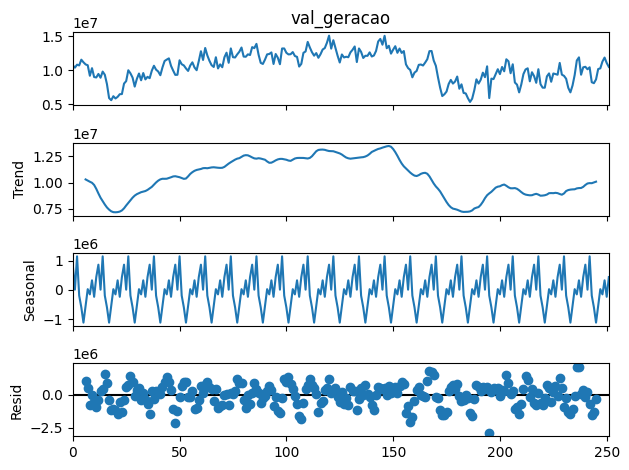

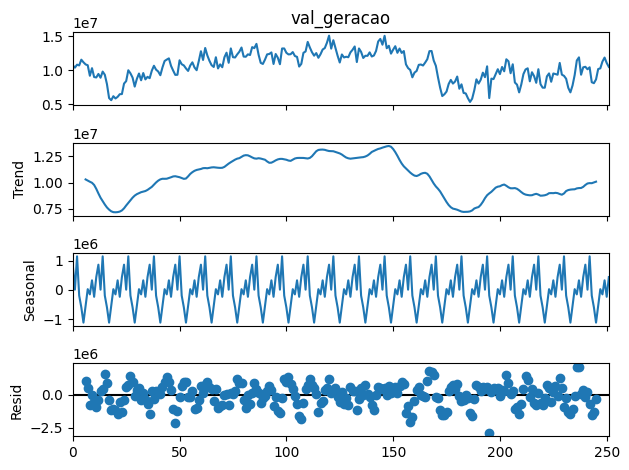

In [82]:
results = seasonal_decompose(data_cleaned_month['val_geracao'], period=12, model='additive')
results.plot()

# <font color='red'> 4) Modelo de predição</font>

In [58]:
import keras
import tensorflow as tf

from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers import Dropout 
from sklearn.preprocessing import MinMaxScaler

In [59]:
temp = data_cleaned_month['val_geracao'].values 

### 4.1) Pré-processamento dos dados: Normalizando dados numa escala entre 0 e 1

In [60]:
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(temp.reshape(-1,1))

In [61]:
print(data_scaled.shape)

(252, 1)


### 4.2) Divisão dos dados: os ultimo 24 meses correspondentes aos anos de 2019 e 2020

In [62]:
train_size = len(data_scaled) - 24
test_size = 24
print("Train Size :",train_size,"Test Size :",test_size)

train_data = data_scaled[:228]
test_data = data_scaled[228:]

Train Size : 228 Test Size : 24


In [63]:
train_data.shape

(228, 1)

In [64]:
test_data.shape

(24, 1)

### 4.3) Preparando séries temporais

In [65]:
def prepare_sequences(data, time_stemp):
    data_X, data_y = [], []
    for i in range(len(data) - time_stemp - 1):
        data_X.append(data[i:(i + time_stemp), 0])
        data_y.append(data[i + time_stemp, 0])
    
    data_X, data_y = np.array(data_X), np.array(data_y)

    return data_X, data_y

In [66]:
time_stemp = 1

# reshape para X=t,t+1,t+2,t+3 e y=t+4
train_X, train_y = prepare_sequences(train_data, time_stemp)
test_X, test_y = prepare_sequences(test_data, time_stemp)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(226, 1)
(226,)
(22, 1)
(22,)


In [67]:
train_X

array([[0.55397171],
       [0.51678708],
       [0.56227069],
       [0.55081313],
       [0.63762855],
       [0.5983908 ],
       [0.56606518],
       [0.5534384 ],
       [0.3947099 ],
       [0.50937492],
       [0.37576354],
       [0.36916227],
       [0.42256097],
       [0.3651552 ],
       [0.45791825],
       [0.41000358],
       [0.26909187],
       [0.05853398],
       [0.02614248],
       [0.0864003 ],
       [0.05264191],
       [0.07669198],
       [0.11686741],
       [0.11873625],
       [0.2768761 ],
       [0.31426111],
       [0.47803907],
       [0.43124996],
       [0.36712777],
       [0.23139366],
       [0.34790944],
       [0.42856128],
       [0.32668855],
       [0.43587045],
       [0.34007672],
       [0.37882337],
       [0.35817458],
       [0.47103492],
       [0.54582025],
       [0.4868906 ],
       [0.45914552],
       [0.40300845],
       [0.52129755],
       [0.61783659],
       [0.63876972],
       [0.6576173 ],
       [0.54446192],
       [0.473

In [68]:
train_y

array([0.51678708, 0.56227069, 0.55081313, 0.63762855, 0.5983908 ,
       0.56606518, 0.5534384 , 0.3947099 , 0.50937492, 0.37576354,
       0.36916227, 0.42256097, 0.3651552 , 0.45791825, 0.41000358,
       0.26909187, 0.05853398, 0.02614248, 0.0864003 , 0.05264191,
       0.07669198, 0.11686741, 0.11873625, 0.2768761 , 0.31426111,
       0.47803907, 0.43124996, 0.36712777, 0.23139366, 0.34790944,
       0.42856128, 0.32668855, 0.43587045, 0.34007672, 0.37882337,
       0.35817458, 0.47103492, 0.54582025, 0.4868906 , 0.45914552,
       0.40300845, 0.52129755, 0.61783659, 0.63876972, 0.6576173 ,
       0.54446192, 0.47314523, 0.40799487, 0.40973981, 0.62824369,
       0.56885466, 0.55061686, 0.50562594, 0.46803086, 0.54969705,
       0.59747232, 0.51963603, 0.47861907, 0.61601568, 0.76499693,
       0.63308402, 0.81394463, 0.70189785, 0.619707  , 0.55449439,
       0.52737924, 0.67449441, 0.50530813, 0.56670425, 0.52334446,
       0.67341861, 0.74308512, 0.59014542, 0.80766335, 0.67515

In [69]:
# reshape dos valores de entrada para [registros, time steps, features] que é necessário para LSTM
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1] , 1)

print(train_X.shape)

(226, 1, 1)


### 4.4) Arquitetando rede neural recorrente (LSTM)

In [70]:
def create_lstm_model(time_stemp: int):
    model = Sequential()
    model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(time_stemp, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer="adam" )
    return model

In [71]:
model = create_lstm_model(time_stemp)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [72]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 125ms/step - loss: 0.3253 - val_loss: 0.1882
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2886 - val_loss: 0.1570
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2485 - val_loss: 0.1244
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2052 - val_loss: 0.0912
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1605 - val_loss: 0.0598
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1203 - val_loss: 0.0340
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0788 - val_loss: 0.0199
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0552 - val_loss: 0.0235
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0439 - val_loss: 0.0393
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0491 - val_loss: 0.0480
Epoch 11/100
4/4 [=========

4/4 [==============================] - 0s 9ms/step - loss: 0.0422 - val_loss: 0.0237
Epoch 19/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0243
Epoch 20/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0375 - val_loss: 0.0237
Epoch 21/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0353 - val_loss: 0.0223
Epoch 22/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0343 - val_loss: 0.0209
Epoch 23/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0342 - val_loss: 0.0198
Epoch 24/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0349 - val_loss: 0.0198
Epoch 25/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0317 - val_loss: 0.0203
Epoch 26/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0314 - val_loss: 0.0194
Epoch 27/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0311 - val_loss: 0.0181
Epoch 28/100
4/4 [=============

In [73]:
epoch = np.arange(0, 100, 10)
losses = []
for i in epoch:
    if i % 10 == 0:
        losses.append(history.history["loss"][i])
        
data = {"epoch":epoch,"loss":losses}
data = pd.DataFrame(data) 

fig = px.line(data,x="epoch",y="loss",width = 1200, height = 500)
fig.show()

# <font color='red'> 5) Avaliação do modelo</font>

### 5.1) Predição dos dados de treino e teste e revertendo a escala dos dados

In [74]:
def data_prediction(model, train_X, test_X, train_y, test_y):
    train_predict = model.predict(train_X)
    test_predict = model.predict(test_X)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    train_y = np.reshape(train_y, (-1, 1))
    test_y = np.reshape(test_y, (-1, 1))

    train_y = scaler.inverse_transform(train_y)
    test_y = scaler.inverse_transform(test_y)

    return train_predict, test_predict, train_y, test_y

In [75]:
train_predict, test_predict, train_y, test_y = data_prediction(model, train_X, test_X, train_y, test_y)

1/1 [==============================] - 0s 13ms/step


### 5.2) Erro Percentual Absoluto Médio

In [76]:
def avaliando_modelo(train_y, test_y, train_predict, test_predict):
    train_rmse = np.sqrt(keras.losses.mean_squared_error(train_y.flatten(), train_predict.flatten()))
    # Convertendo RMSE para termos percentuais
    train_rmse_percent = (train_rmse / np.mean(train_y.flatten())) * 100
    print('Train Score: %.2f%% RMSE' % train_rmse_percent)

    test_rmse = np.sqrt(keras.losses.mean_squared_error(test_y.flatten(), test_predict.flatten()))
    # Convertendo RMSE para termos percentuais
    test_rmse_percent = (test_rmse / np.mean(test_y.flatten())) * 100
    print('Test Score: %.2f%% RMSE\n' % test_rmse_percent)

    trainScore = (keras.losses.mean_absolute_percentage_error(train_y.flatten(), train_predict.flatten()))
    print('Train Score: %.2f%% MAPE' % (trainScore))
    testScore = (keras.losses.mean_absolute_percentage_error(test_y.flatten() , test_predict.flatten()))
    print('Test Score: %.2f%% MAPE' % (testScore))

In [77]:
avaliando_modelo(train_y, test_y, train_predict, test_predict)

Train Score: 9.74% RMSE
Test Score: 11.62% RMSE

Train Score: 8.54% MAPE
Test Score: 9.77% MAPE


### 5.3) Plotando gráfico de predição 

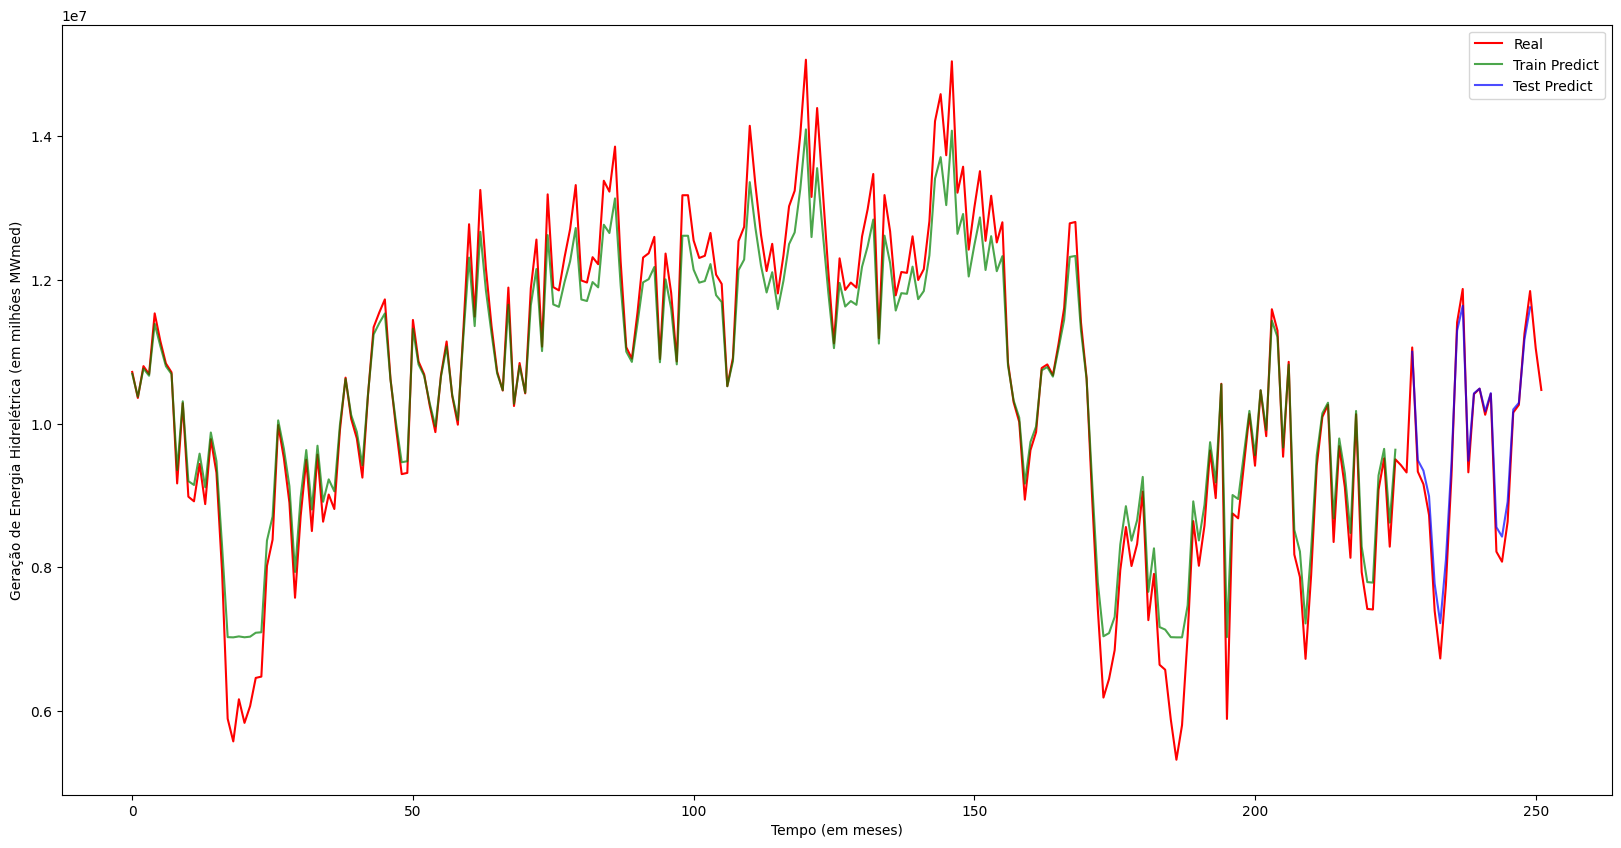

In [78]:
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(train_predict), :] = train_predict
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_stemp*2):len(data_scaled) -2, :] = test_predict


plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data_scaled),color = "red",label = "Real")
plt.plot(trainPredictPlot,label = "Train Predict",color = "green",alpha = 0.7)
plt.plot(testPredictPlot,label = "Test Predict",color = "blue", alpha = 0.7)
plt.legend()
plt.xlabel("Tempo (em meses)")
plt.ylabel("Geração de Energia Hidrelétrica (em milhões MWmed)")
plt.show()

### 5.4) Comparando os resultados com os reais

In [79]:
pd.options.display.float_format = '{:.2f}'.format

test_y_flatten = test_y.flatten()[:]
test_predict_flatten = test_predict.flatten()[:]
# Cálculo da diferença percentual
percentage_difference = abs(((test_y_flatten - test_predict_flatten) / test_y_flatten) * 100)

# DataFrame com os valores reais, previstos e a diferença percentual
comparacao_df = pd.DataFrame({'Real': test_y_flatten, 'Predito': test_predict_flatten, 'Diferença (%)': percentage_difference})

comparacao_df.index = range(1, 23)

# Calcula a diferença percentual total entre as médias dos valores reais e previstos
total_percentage_difference = abs(((test_y_flatten.mean() - test_predict_flatten.mean()) / test_y_flatten.mean()) * 100)

total_row = pd.DataFrame({'Real': test_y_flatten.mean(), 'Predito': test_predict_flatten.mean(), 'Diferença (%)': total_percentage_difference}, index=['Média'])
comparacao_df = pd.concat([comparacao_df, total_row])

display(comparacao_df)

,Real,Predito,Diferença (%)
1,9331222.26,10999177.00,17.87
2,9156961.87,9491220.00,3.65
3,8726184.24,9344682.00,7.09
4,7393989.09,8986659.00,21.54
5,6730046.81,7770789.00,15.46
6,7741992.29,7221663.50,6.72
7,9282903.07,8098576.00,12.76
8,11410340.02,9450489.00,17.18
9,11874192.85,11295733.00,4.87
10,9321581.46,11639927.00,24.87
